# Exploratory Data Analytics on Philippine Bills from 13th Congress to 17th Congress

## Importing Python Packages

In [88]:
# For loading, manipulating dataframe.
import pandas as pd
import sqlite3, datetime, re

# For Text Preprocessing
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Visualizations
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Hide Warning messages
import warnings
warnings.filterwarnings('ignore')

In [89]:
con = sqlite3.connect("phBills.db")
df = pd.read_sql_query("SELECT * from senateBills", con, index_col = 'bill_id', parse_dates = ['date_filed','date_lastUpdate'])
con.close()

In [90]:
df_senators = pd.read_excel('Congress Members.xlsx',sheet_name='Senators')
df_senators['sponsorids']=df_senators['Congress #'].apply(str)+'_'+df_senators.Surname.str.lower()
df_senators.sort_values(by=['sponsorids'],inplace=True)

In [91]:
sponsors_dict = {}
for (ids,bloc) in zip(df_senators['sponsorids'].tolist(),df_senators['Bloc'].tolist()):
    sponsors_dict[ids]=bloc

In [92]:
sponsor_regex = re.compile(r'[A-Z][\w ]*(?=[ ,])')
sponsorids = df_senators['sponsorids'].tolist()
def getBloc(congress, sponsors):
    sponsors = [str(congress)+'_'+sponsor.lower() for sponsor in sponsor_regex.findall(sponsors) if ' ' in sponsor]
    for sponsor in sponsors
    return sponsors

SyntaxError: invalid syntax (<ipython-input-92-32efffbfc668>, line 5)

In [ ]:
df['Passed']=np.where(df.ra!='',True, False)
df['long_title']=df['long_title'].str.lower()
df_13_17_all = df[df['congress']!=18]
df_num_rows, df_num_col = df.shape
print(f"There are {df_num_rows} records and {df_num_col} features from our original data frame.")
bill_passage_rate = (df_13_17_all['ra']!='').sum()/((df_13_17_all['ra']!='').sum() + (df_13_17_all['ra']=='').sum())
print(f"From 13th Congress to 17th Congress, the PH Bill Passage Rate is {(bill_passage_rate*100):.2f}%")

In [ ]:
df_13_17_all['']

In [80]:
df_senators.head()

,Code,Surname,First Name,Full Name,Party,# of Terms,Term Starts,Term Ends,Bloc,City/municipality of registration,Congress #,sponsorids
0,1,Angara,Eduardo,Eduardo Angara,LDP,1,2001,2007,Minority,Baler (Central Luzon),13,13_angara
1,4,Arroyo,Joker,Joker Arroyo,Independent,1,2001,2007,Majority,(blank),13,13_arroyo
2,5,Biazon,Rodolfo,Rodolfo Biazon,Liberal,2,2004,2010,Majority,(blank),13,13_biazon
3,8,Cayetano,Pilar Juliana,Pilar Juliana Cayetano,Lakas-CMD,1,2004,2010,Majority,Taguig,13,13_cayetano
4,38,Santiago,Miriam,Miriam Santiago,PRP,1,2004,2010,Minority,Quezon City,13,13_santiago


In [79]:
df_13_17_all.head()

,num,link,congress,short_title,long_title,date_filed,scope,status,author,subject,pri_committee,date_lastUpdate,logs,ra,Passed
bill_id,,,,,,,,,,,,,,,
17SBN-2235,SBN-2235,http://www.senate.gov.ph/lis/bill_res.aspx?con...,17,FISCAL REGIME FOR THE MINING INDUSTRY,an act establishing the fiscal regime for the ...,2019-05-28,National,"Pending Second Reading, Special Order","Drilon, Franklin M., Recto, Ralph G., Sotto II...",Mining Companies,Ways and Means,2019-05-28,5/28/2019\nPrepared and submitted by the Commi...,,False
17SBN-2234,SBN-2234,http://www.senate.gov.ph/lis/bill_res.aspx?con...,17,PARCELS OF LAND IN BARANGAY KRUS NA LIGAS (QUE...,an act authorizing the sale of certain parcels...,2019-05-27,National,Approved by the President of the Philippines,"Recto, Ralph G., Sotto III, Vicente C., Escude...",University of the Philippines Charter (R.A.No....,"Education, Arts and Culture",2019-06-30,5/27/2019\nPrepared and submitted jointly by t...,11454,True
17SBN-2233,SBN-2233,http://www.senate.gov.ph/lis/bill_res.aspx?con...,17,EXCISE TAX INCREASE ON TOBACCO PRODUCTS,an act increasing the excise tax on tobacco pr...,2019-05-27,National,Consolidated with Approved Bill,"Pacquiao, Emmanuel ""Manny"" D., Ejercito, Josep...",Taxes (Excise Tax)Tobacco Products/Tobacco Ind...,Ways and Means,2019-06-30,5/27/2019\nPrepared and submitted by the Commi...,11346,True
17SBN-2232,SBN-2232,http://www.senate.gov.ph/lis/bill_res.aspx?con...,17,SENIOR HIGH SCHOOL RESERVE OFFICERS TRAINING C...,"an act mandating the institutionalization, dev...",2019-05-22,National,"Pending Second Reading, Special Order","Pacquiao, Emmanuel ""Manny"" D., Sotto III, Vice...",Reserve Officers Training Corps (ROTC)National...,"Education, Arts and Culture",2019-05-27,5/22/2019\nPrepared and submitted jointly by t...,,False
17SBN-2231,SBN-2231,http://www.senate.gov.ph/lis/bill_res.aspx?con...,17,AL-AMANAH ISLAMIC BANK OF THE PHILIPPINES ACT,an act strengthening the al-amanah islamic bank,2019-05-22,National,"Pending Second Reading, Special Order","Aquino IV, Paolo Benigno ""Bam"", Escudero, Fran...",Islamic Banking,"Banks, Financial Institutions and Currencies",2019-05-22,5/22/2019\nPrepared and submitted jointly by t...,,False


## Text Processing

In [93]:
df_13_17_all=df_13_17_all[df_13_17_all['status']!='Withdrawn']

In [7]:
df_13_17_all['num_authors']=((df_13_17_all.author.str.count(',') + 1)/2).astype('int')

In [6]:
df_13_17_all['lapsed_day']=np.where(df_13_17_all.Passed==True,df_13_17_all.date_lastUpdate-df_13_17_all.date_filed,
                                    pd.to_datetime('today')-df_13_17_all.date_filed)

In [17]:
passed_ave = df_13_17_all[df_13_17_all['Passed']==True]['lapsed_day'].median()
df_13_17_all['upper']=np.where(df_13_17_all.lapsed_day>passed_ave,True,False)

In [8]:
df_13_17_all[df_13_17_all['Passed']==True]['lapsed_day'].median()

Timedelta('306 days 12:00:00')

In [9]:
df_13_17_all[df_13_17_all['Passed']==True]['lapsed_day'].mean()

Timedelta('374 days 15:30:24.657534')

In [10]:
df_13_17_all[df_13_17_all['Passed']==True]['lapsed_day'].mode()[0]

Timedelta('546 days 00:00:00')

In [11]:
df_13_17_all['mon']=df_13_17_all.date_filed.apply(lambda x: x.month)

In [12]:
print(df_13_17_all[df_13_17_all['Passed']==True].scope.value_counts(dropna=False))
print(f"\nOnly {(((df_13_17_all.Passed==True)&\
(df_13_17_all.scope=='Local')).sum())/((df_13_17_all.Passed==True).sum()):.2%} of local senate bills are passed.")

National    421
Local        17
Name: scope, dtype: int64

Only 3.88% of local senate bills are passed.


In [13]:
print(df_13_17_all[df_13_17_all['Passed']==False].scope.value_counts(dropna=False))
print(f"\nOnly {(((df_13_17_all.Passed==False)&\
(df_13_17_all.scope=='Local')).sum())/((df_13_17_all.Passed==False).sum()):.2%} of local senate bills are passed.")

National    14076
Local         564
Name: scope, dtype: int64

Only 3.85% of local senate bills are passed.


In [14]:
df_13_17_all.head(1)

,num,link,congress,short_title,long_title,date_filed,scope,status,author,subject,pri_committee,date_lastUpdate,logs,ra,Passed,num_authors,lapsed_day,upper,mon
bill_id,,,,,,,,,,,,,,,,,,,
17SBN-2235,SBN-2235,http://www.senate.gov.ph/lis/bill_res.aspx?con...,17,FISCAL REGIME FOR THE MINING INDUSTRY,an act establishing the fiscal regime for the ...,2019-05-28,National,"Pending Second Reading, Special Order","Drilon, Franklin M., Recto, Ralph G., Sotto II...",Mining Companies,Ways and Means,2019-05-28,5/28/2019\nPrepared and submitted by the Commi...,,False,4,176 days 00:40:14.768978,False,5


In [18]:
cols_of_interest = ['num_authors','lapsed_day','upper','mon','Passed']
data_set = df_13_17_all[cols_of_interest]
data_set['lapsed_day'] = data_set.lapsed_day.astype('int')

In [19]:
data_set.corr()

,num_authors,lapsed_day,upper,mon,Passed
num_authors,1.000000,-0.198624,-0.392653,-0.029448,0.513843
lapsed_day,-0.198624,1.000000,0.275289,0.008458,-0.320543
upper,-0.392653,0.275289,1.000000,0.069507,-0.606577
mon,-0.029448,0.008458,0.069507,1.000000,0.006364
Passed,0.513843,-0.320543,-0.606577,0.006364,1.000000


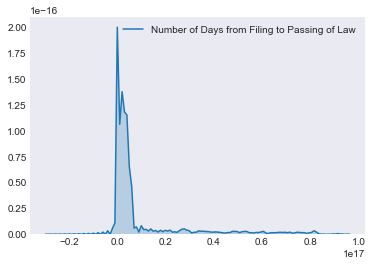

In [16]:
plt.style.use('seaborn-dark')
sns.kdeplot(df_13_17_all['lapsed_day'].astype('int'), shade=True, label='Number of Days from Filing to Passing of Law');

In [20]:
df_13_17_all['long_title'] = df_13_17_all['long_title'].map(word_tokenize)

In [21]:
df_13_17_all['long_title'] = df_13_17_all['long_title'].map(pos_tag)

In [22]:
df_13_17_all['long_title'] = df_13_17_all['long_title'].map(lambda words: 
                            [word for word in words if (word[1].startswith('N') or word[1].startswith('J'))])

In [23]:
stoppers = stopwords.words('english')
stoppers.extend(['act', 'presidential', 'ii', 'eo', 'code', 'government', 'provide', 'purpose', 'therefor', 'penal', 
           'thereof', 'revised', 'article', 'provision', 'amended', 'therefore', 'ng', 'ra', 'b', 'san', 'sa', 
           'del', 'pd', 'decree', 'rano', 'fund', 'program', 'national', 'law', 'republic', 'philippine', 'otherwise', 
           'section','philippines'])

In [24]:
df_13_17_all['long_title']=df_13_17_all['long_title'].map(lambda tags: 
                                                                [tag[0] for tag in tags if tag[0] not in stoppers])

In [25]:
lemmatizer = WordNetLemmatizer()
df_13_17_all['long_title'] = df_13_17_all['long_title'].map(lambda words: 
                                                                [lemmatizer.lemmatize(word) for word in words])

In [26]:
def allWordChar(word):
    return not(any(char.isdigit() for char in word))

In [27]:
df_13_17_all['long_title'] = df_13_17_all['long_title'].apply(lambda words:
                                                      [word for word in words if allWordChar(word)])

In [28]:
df_13_17_all['processed'] = df_13_17_all['long_title'].apply(lambda x: ' '.join(x))

In [29]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_out = tfidf_vectorizer.fit_transform(df_13_17_all['processed'])

In [30]:
df_vect_words = pd.DataFrame(sorted(tfidf_vectorizer.vocabulary_.items(), key=lambda kv: kv[1], reverse=True),
                  columns = ['Word', 'Count'])

## EDA

<BarContainer object of 30 artists>

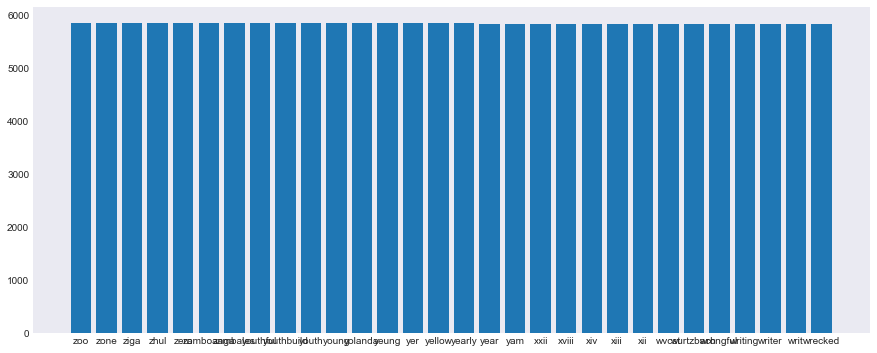

In [31]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,6))
plt.bar(df_vect_words['Word'].head(30), df_vect_words['Count'].head(30))

## Modeling

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [32]:
ds = pd.DataFrame(tfidf_out.todense())

In [33]:
ds['upper']=data_set['upper'].tolist()
ds['num_authors']=data_set['num_authors'].tolist()

In [34]:
scaler = StandardScaler()

In [35]:
ds_scaled = scaler.fit_transform(ds)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(ds_scaled, df_13_17_all['Passed'], test_size = 0.25, random_state=43)
print(f"Our train set has {X_train.shape[0]:,} data points whilst our test set has {X_test.shape[0]:,} data points.")
print(f"\n{y_test.sum()/X_test.shape[0]:.2%} from the test set are actual positives.")

Our train set has 11,308 data points whilst our test set has 3,770 data points.
3.10% from the test set are actual positives.


In [37]:
# Under sample the majority target variable, so that we get about equal number of observations from both classes.
rus = RandomUnderSampler(random_state=42)
nx_train, ny_train = rus.fit_resample(X_train, y_train)
print(f"Our new train set has {ny_train.shape[0]} data points, {np.sum(ny_train)} of which are actual positives.")

Our new train set has 642 data points, 321 of which are actual positives.


In [38]:
svd = TruncatedSVD(n_components=20, algorithm='arpack', random_state = 42)
nx_train_svd = svd.fit_transform(nx_train)
x_test_svd = svd.transform(X_test)

In [39]:
svc = SVC(gamma='auto', kernel='linear', random_state = 42)
svc.fit(nx_train_svd, ny_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
predicted = svc.predict(x_test_svd)

In [41]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.99      0.94      0.97      3653
        True       0.27      0.68      0.39       117

    accuracy                           0.93      3770
   macro avg       0.63      0.81      0.68      3770
weighted avg       0.97      0.93      0.95      3770

